In [6]:
%matplotlib inline

from __future__ import (print_function, division, absolute_import,
                        unicode_literals)

import numpy as np
import time
from approxposterior import utility as ut, gp_utils
from approxposterior import likelihood as ll

import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rcParams.update({'font.size': 18})

In [2]:
# Array to hold number of forward model (likelihood evaluations)
ns = np.array([10, 25, 50, 100, 250, 500, 1000, 2500], dtype=int)
iters = np.array([10, 10, 10, 5, 5, 5, 2, 1])

train_times = list()
predict_times = list()

for ii, n in enumerate(ns):
    print(n)
    
    # Sample data points, evaluate likelihood
    theta_train = ll.rosenbrock_sample(ns[ii])
    y = ll.rosenbrock_lnlike(theta_train)
    
    # See how long it takes to train GP
    best = np.inf
    for _ in range(iters[ii]):
        start = time.time()
        gp = gp_utils.setup_gp(theta_train, y, which_kernel="ExpSquaredKernel")
        gp = gp_utils.optimize_gp(gp, theta_train, y, which_kernel="ExpSquaredKernel")
        dt = time.time() - start
        
        if dt < best:
            best = dt
    train_times.append(best)
    
    # See how long it takes GP to make predictions on new data
    theta_test = ll.rosenbrock_sample(ns[ii])
    
    best = np.inf
    for _ in range(iters[ii]):
        start = time.time()
        gp.predict(y, theta_test, return_var=False, return_cov=False)
        dt = time.time() - start
        
        if dt < best:
            best = dt
    predict_times.append(best)

10
25
50
100
250
500
1000
2500


In [3]:
# Create synthetic forward model times
fm_1s = 1*ns
fm_10s = 10*ns
fm_60s = 60*ns
fm_1000s = 1000*ns

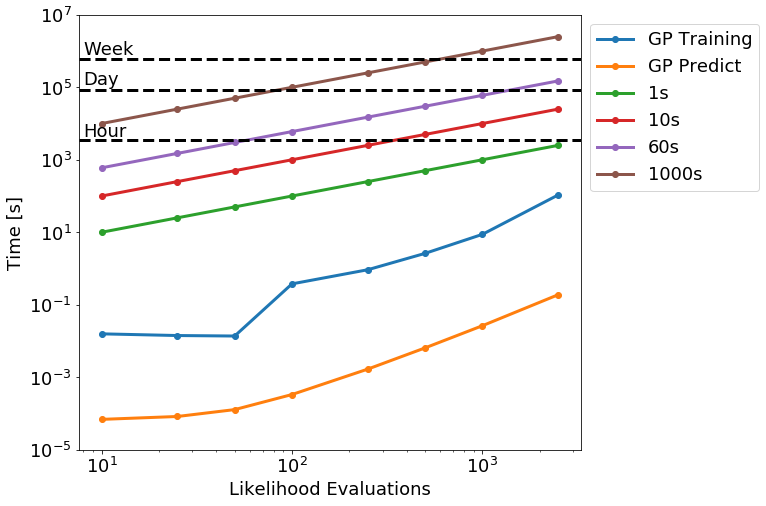

In [7]:
fig, ax = plt.subplots(figsize=(9,8))

# Plot GP timings
gp_total = np.array(train_times) + np.array(predict_times)
ax.plot(ns, train_times, "o-", lw=3, label="GP Training")
ax.plot(ns, predict_times, "o-", lw=3, label="GP Predict")

# Plot synthetic forward model timings
ax.plot(ns, fm_1s, "o-", lw=3, label="1s")
ax.plot(ns, fm_10s, "o-", lw=3, label="10s")
ax.plot(ns, fm_60s, "o-", lw=3, label="60s")
ax.plot(ns, fm_1000s, "o-", lw=3, label="1000s")

# Reference week, day, hour timescales
ax.axhline((7*24*60*60), lw=3, ls="--", color="k")
ax.axhline((24*60*60), lw=3, ls="--", color="k")
ax.axhline((60*60), lw=3, ls="--", color="k")

ax.text(8, 8.0e5, "Week")
ax.text(8, 1.2e5, "Day")
ax.text(8, 4.3e3, "Hour")

ax.set_ylim(1.0e-5,1.0e7)

ax.set_xscale("log")
ax.set_yscale("log")
ax.legend(bbox_to_anchor=(1,1))

ax.set_ylabel("Time [s]")
ax.set_xlabel("Likelihood Evaluations")

fig.savefig("gp_timing.pdf", bbox_inches="tight")